In [1]:
!move C:\Users\user\Downloads\data\datasets_180_408_data.csv .

        1개 파일을 이동했습니다.


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (569, 31)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()

Mapping on data shaped (569, 31) using lens shaped (569, 2)

Minimal points in hypercube before clustering: 4
Creating 225 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

Cube_29 is empty.

Cube_30 is empty.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is e

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


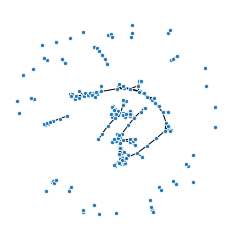

In [4]:
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with `pip install pandas` and then try again.")
    sys.exit()

import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

# For data we use the Wisconsin Breast Cancer Dataset
# Via:
df = pd.read_csv("Breast-Cancer-wisconsin.csv")
feature_names = [c for c in df.columns if c not in ["id", "diagnosis"]]
df["diagnosis"] = df["diagnosis"].apply(lambda x: 1 if x == "M" else 0)
X = np.array(df[feature_names].fillna(0))  # quick and dirty imputation
y = np.array(df["diagnosis"])

# We create a custom 1-D lens with Isolation Forest
model = ensemble.IsolationForest(random_state=1729)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

# We create another 1-D lens with L2-norm
mapper = km.KeplerMapper(verbose=3)
lens2 = mapper.fit_transform(X, projection="l2norm")

# Combine both lenses to create a 2-D [Isolation Forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

# Create the simplicial complex
graph = mapper.map(lens,
                   X,
                   cover=km.Cover(n_cubes=15, perc_overlap=0.3),
                   clusterer=sklearn.cluster.KMeans(n_clusters=4,
                                                    random_state=1618033))

# Visualization
from kmapper import jupyter
html = mapper.visualize(graph, path_html="breast-cancer-output.html")
jupyter.display(path_html="breast-cancer-output.html")





import matplotlib.pyplot as plt
km.draw_matplotlib(graph)
plt.show()